In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np 
import pandas as pd 

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

In [ ]:
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

 Input the data

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [4]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [5]:
df = df.drop_duplicates()

 Uniqueness

In [6]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


 Missing Values

In [7]:
# Checking null values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [8]:
# Remove Unneccessary value [0.00195%]
df = df[df['gender'] != 'Other']

Describe the Data 

In [9]:
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


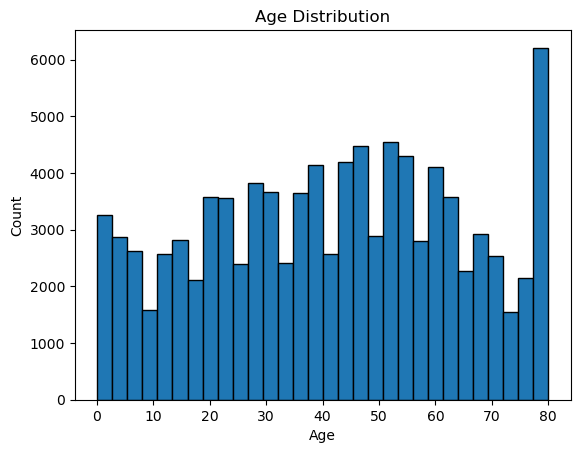

In [10]:
# Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Bar plot for gender 

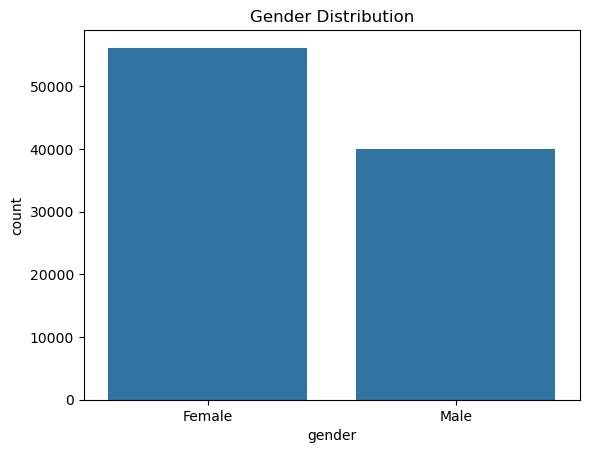

In [11]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

 Distribution plot for BMI

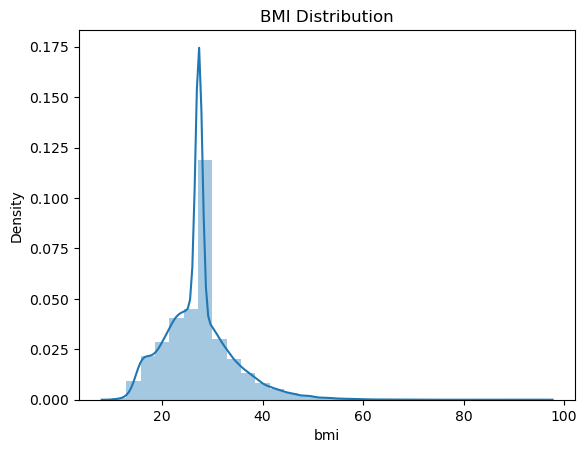

In [12]:
# Distribution plot for BMI
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

Count plots for binary variables

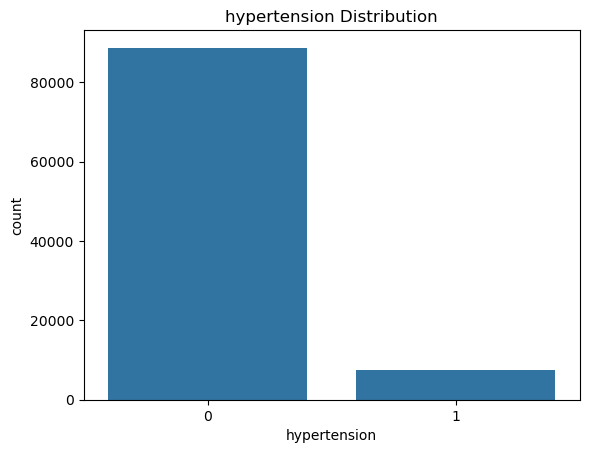

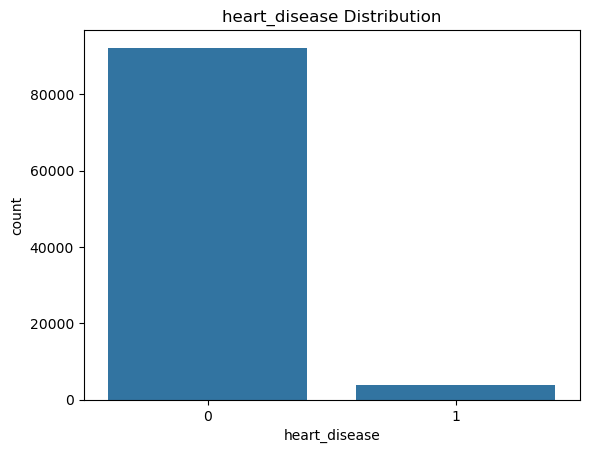

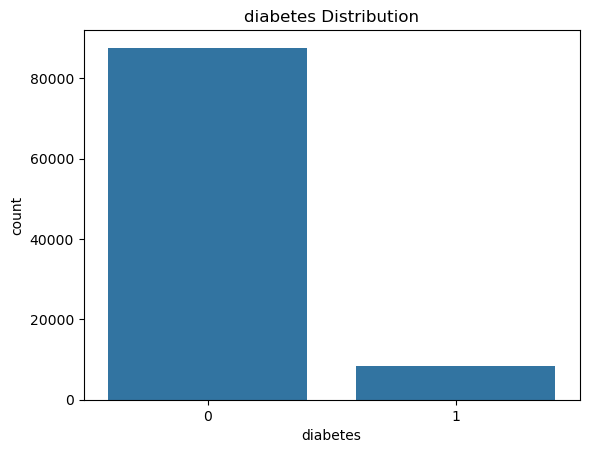

In [13]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

Count plot for smoking history 

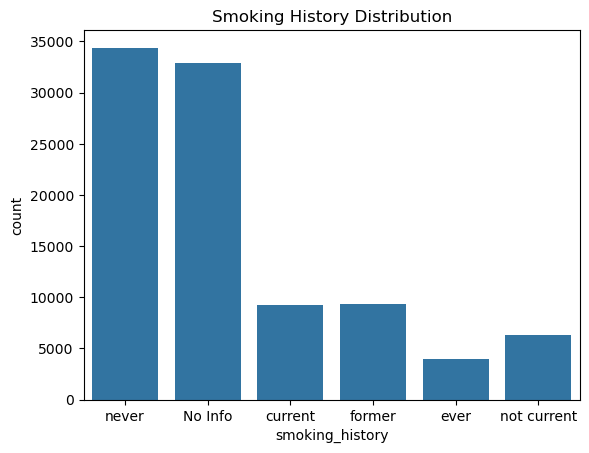

In [14]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

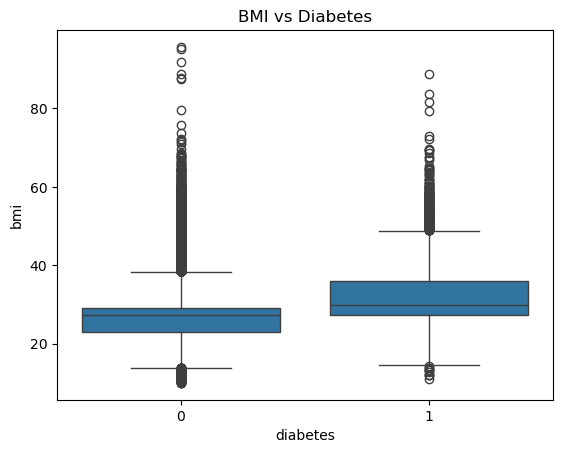

In [15]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

 Boxplot Age vs Diabetes classification

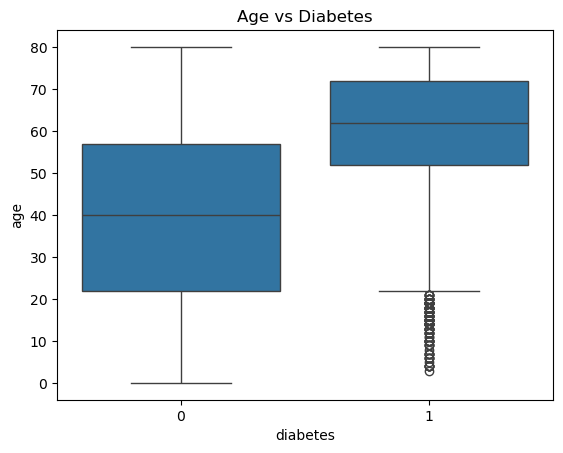

In [16]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

 Count plot of gender vs diabetes

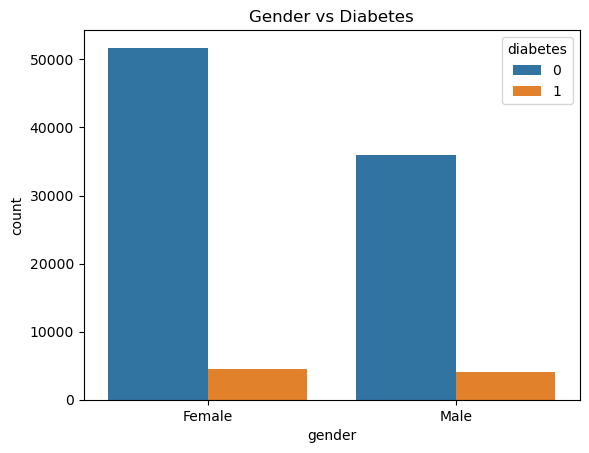

In [17]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

 Boxplot HbA1c level vs Diabetes classification

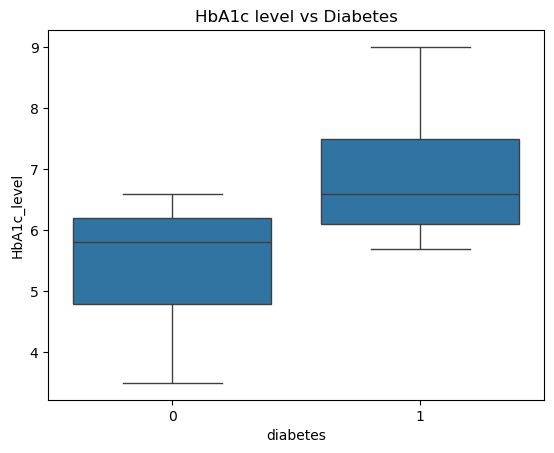

In [18]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

Boxplot blood glucose level vs Diabetes classification

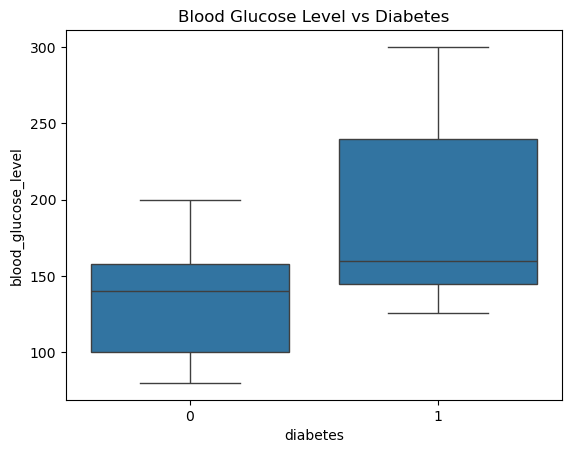

In [19]:
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

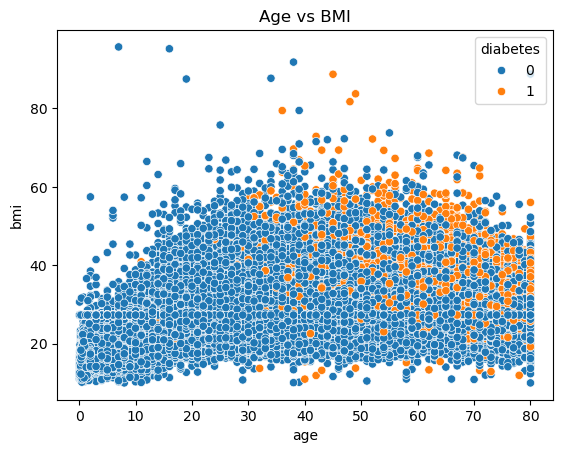

In [20]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

 Violin plot of BMI against diabetes classification split by gender

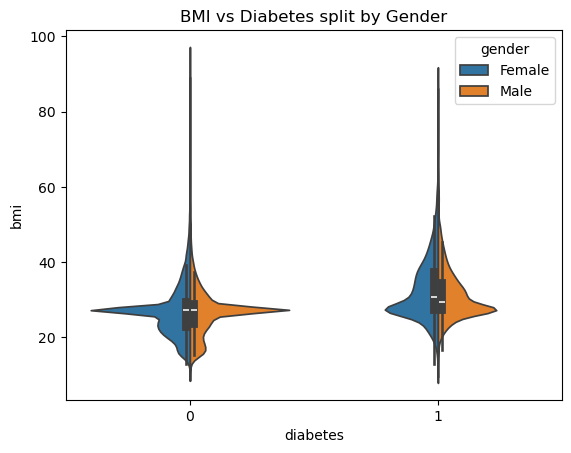

In [21]:
# Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

Interaction between gender, BMI and diabetes

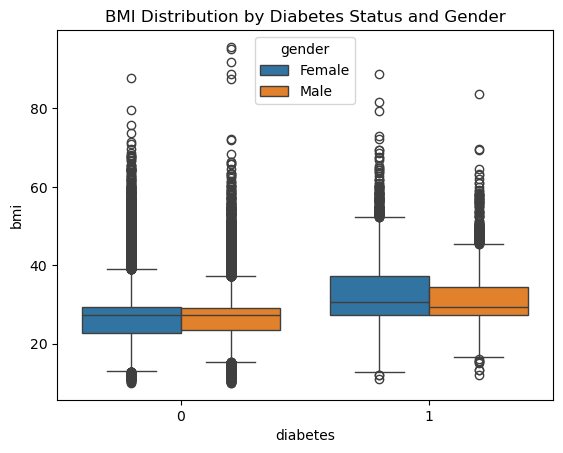

In [22]:
# Interaction between gender, BMI and diabetes
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

Interaction between gender, Age and diabetes

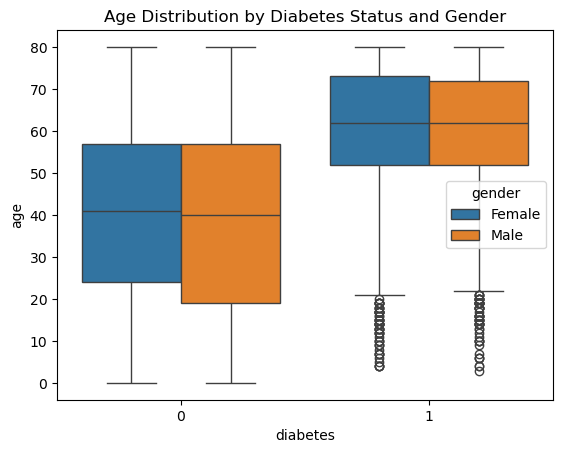

In [23]:
# Interaction between gender, Age and diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

In [ ]:
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

print(df['smoking_history'].value_counts())

smoking_history
non-smoker     67276
past_smoker    19655
current         9197
Name: count, dtype: int64


In [25]:
data = df.copy()

 Encoding

In [ ]:
def perform_one_hot_encoding(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

data = perform_one_hot_encoding(data, 'gender')

data = perform_one_hot_encoding(data, 'smoking_history')

Correlation Matrix

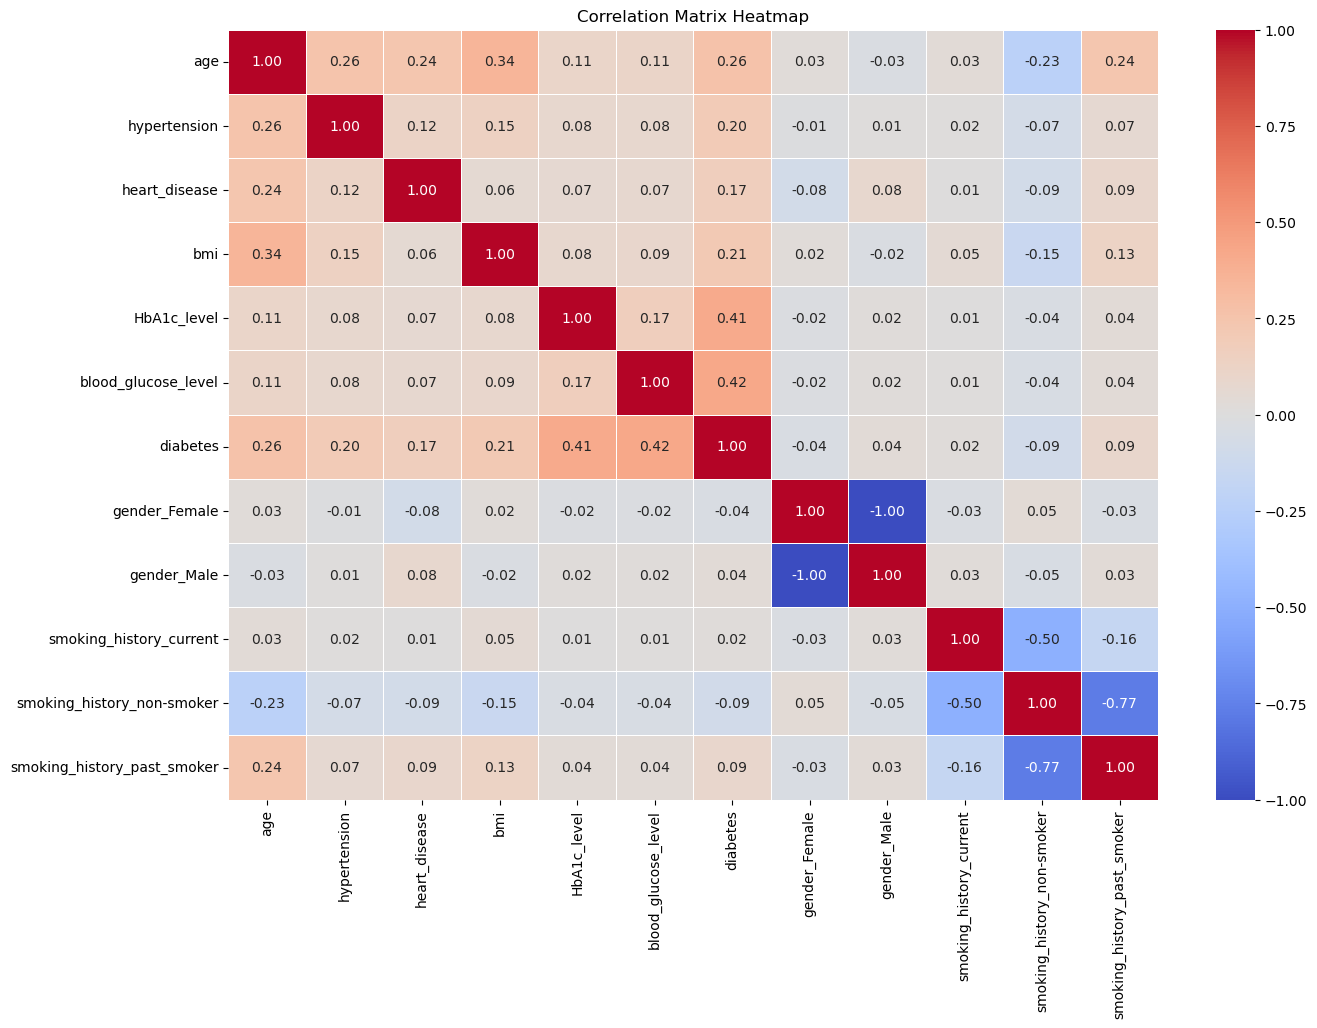

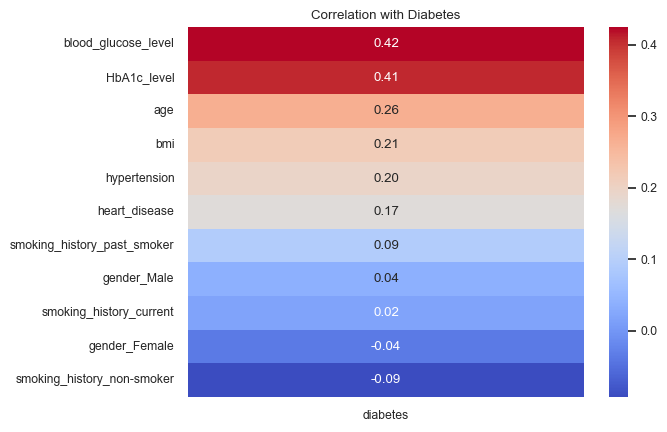

In [27]:
# Compute the correlation matrix
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()



From the EDA ,the dataset is imbalanced (with 9% positive cases for diabetes and 91% negative cases), it's essential to balance the data to ensure that the model doesn't get biased towards the majority class. For this purpose, the Synthetic Minority Over-sampling Technique (SMOTE) is used, which generates synthetic samples for the minority class.

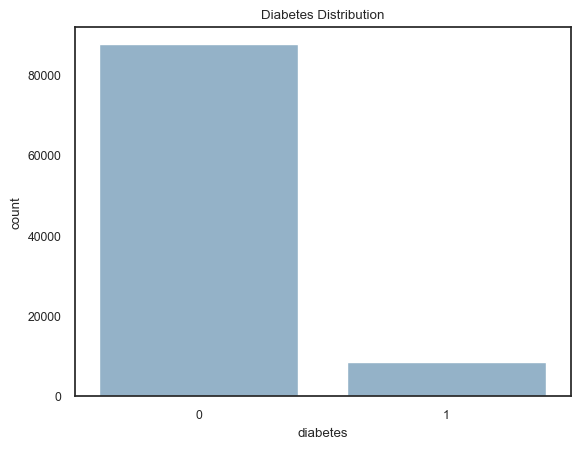

In [28]:
# Count plot for the 'diabetes' variable
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()

In [29]:
# Define resampling
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)



Preprocessing is a crucial step before training the model. In this case, numerical features are standardized (mean removed and scaled to unit variance), and categorical features are one-hot encoded.One-hot encoding is necessary for categorical variables to be correctly understood by the machine learning model.

The StandardScaler sklearn is based on the assumption that the data, Y, follows a distribution that might not necessarily be Gaussian (normal), but we still transform it in a way that its distribution will have a mean value 0 and standard deviation of 1.


 This transformation is also known as Z-score normalization.


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [ ]:
clf = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', RandomForestClassifier())])

In [32]:
# Define the hyperparameters and the values we want to test
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [33]:
# Create Grid Search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}




The result shows the best parameters for our Random Forest model that were found during the hyperparameter tuning process:

1. **max_depth of 10:** This indicates that the maximum depth of the trees in the forest is 10 levels. Constraining the depth of the tree helps in reducing overfitting. It appears from this result that a medium-complexity tree works best for our data. Too much complexity (a deeper tree) may capture noise, and too little (a shallower tree) may not capture the underlying structure of the data.

2. **min_samples_leaf of 2:** This means that each leaf (the end node of a decision tree, where predictions are made) must contain at least two samples. This parameter, like max_depth, is a way to control overfitting. By requiring at least two samples to make a prediction, the model prevents fitting to outliers or noise in the training data.

3. **min_samples_split of 2:** This tells us that a node must contain at least two samples in order to be split (to create two child nodes). Similar to the min_samples_leaf parameter, this can help control overfitting.

4. **n_estimators of 50:** This is the number of decision trees in the forest. The Random Forest algorithm works by averaging the predictions of many decision trees to make a final prediction, which helps reduce overfitting and variance. In this case, it seems that having 50 trees in the forest gives us the best performance.


 
    
    

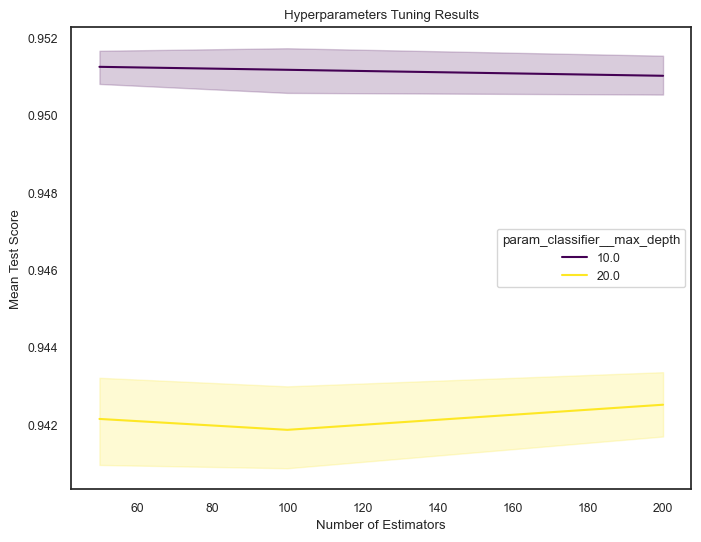

In [34]:
# Convert GridSearchCV results to a DataFrame and plot
results_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='viridis')
plt.title('Hyperparameters Tuning Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

Model Accuracy:  0.9530323520233018
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17525
           1       0.71      0.79      0.75      1701

    accuracy                           0.95     19226
   macro avg       0.85      0.88      0.86     19226
weighted avg       0.96      0.95      0.95     19226



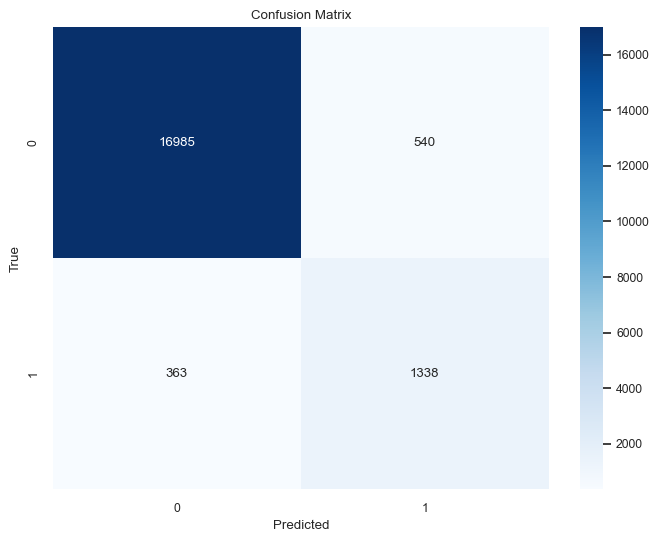

In [35]:
# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



The feature importance gives insight into which features are most useful for making predictions. The features are ranked by their importance and visualized using a bar plot.

                        Feature  Importance
2                   HbA1c_level        0.43
3           blood_glucose_level        0.33
0                           age        0.12
1                           BMI        0.06
4                  hypertension        0.03
5                 heart_disease        0.02
10  smoking_history_past_smoker        0.00
9    smoking_history_non-smoker        0.00
6                 gender_Female        0.00
7                   gender_Male        0.00
8       smoking_history_current        0.00


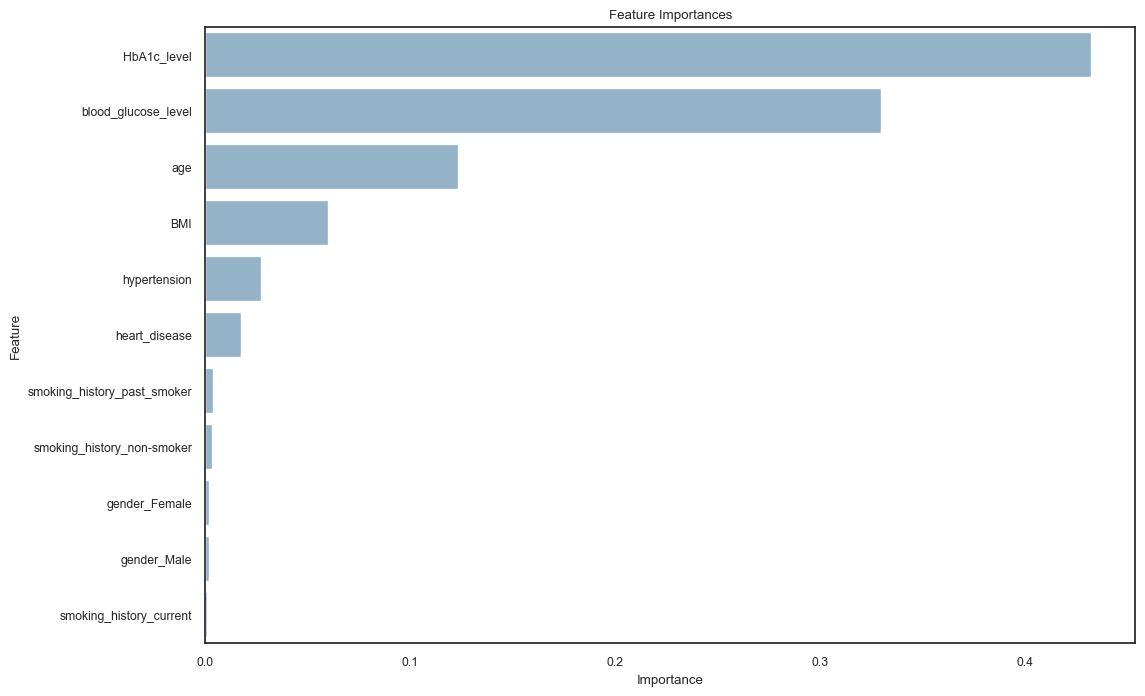

In [36]:
# After fitting the model, we input feature names
onehot_columns = list(grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))

# Then we add the numeric feature names
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns

# And now let's get the feature importances
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

In [37]:
# Create logistic regression pipeline with preprocessing and resampling
lr_clf = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', LogisticRegression(max_iter=1000))])

# Define hyperparameters for logistic regression
lr_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],
    'classifier__solver': ['liblinear', 'saga']
}

# Create Grid Search object for logistic regression
lr_grid_search = GridSearchCV(lr_clf, lr_param_grid, cv=5, scoring='accuracy')

# Train the logistic regression model
lr_grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Logistic Regression: ", lr_grid_search.best_params_)
print("Best Score: ", lr_grid_search.best_score_)

Best Parameters for Logistic Regression:  {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Score:  0.9298717770197452


Logistic Regression Model Accuracy:  0.9284822636013731
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     17525
           1       0.57      0.79      0.66      1701

    accuracy                           0.93     19226
   macro avg       0.77      0.86      0.81     19226
weighted avg       0.94      0.93      0.93     19226



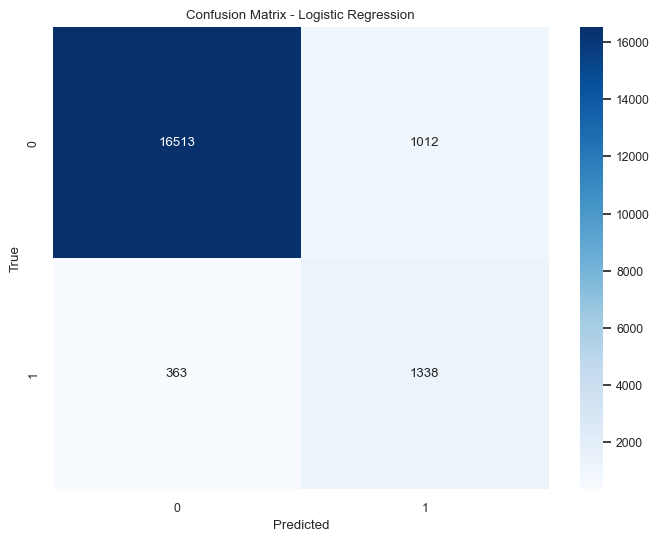

In [38]:
# Predict on the test set using the best logistic regression model
lr_y_pred = lr_grid_search.predict(X_test)

# Evaluate the logistic regression model
print("Logistic Regression Model Accuracy: ", accuracy_score(y_test, lr_y_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_y_pred))

# Plot confusion matrix for logistic regression
lr_cm = confusion_matrix(y_test, lr_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [40]:
# Create SVC pipeline with preprocessing and resampling
svc_clf = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', SVC())])

# Define hyperparameters for SVC
svc_param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'sigmoid'],
    'classifier__gamma': ['scale', 'auto', 0.1, 1]
}

# Create Grid Search object for SVC
svc_grid_search = GridSearchCV(
    svc_clf, svc_param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
# Train the SVC model
svc_grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for SVC: ", svc_grid_search.best_params_)
print("Best Score: ", svc_grid_search.best_score_)

Best Parameters for SVC:  {'classifier__C': 10, 'classifier__gamma': 1, 'classifier__kernel': 'linear'}
Best Score:  0.9301318372886549


SVC Model Accuracy:  0.9271299282221991
SVC Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     17525
           1       0.56      0.79      0.66      1701

    accuracy                           0.93     19226
   macro avg       0.77      0.87      0.81     19226
weighted avg       0.94      0.93      0.93     19226



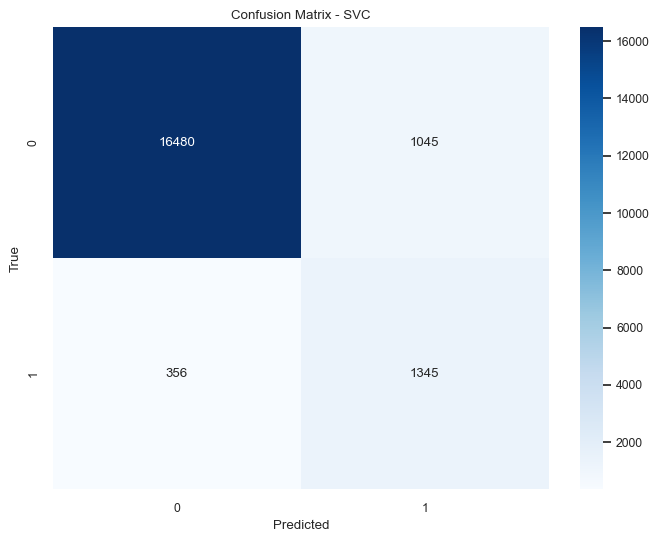

In [41]:
# Predict on the test set using the best SVC model
svc_y_pred = svc_grid_search.predict(X_test)

# Evaluate the SVC model
print("SVC Model Accuracy: ", accuracy_score(y_test, svc_y_pred))
print("SVC Classification Report:\n", classification_report(y_test, svc_y_pred))

# Plot confusion matrix for SVC
svc_cm = confusion_matrix(y_test, svc_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVC')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Model Accuracy Comparison:
                 Model  Accuracy
0        Random Forest      0.95
1  Logistic Regression      0.93
2                  SVC      0.93


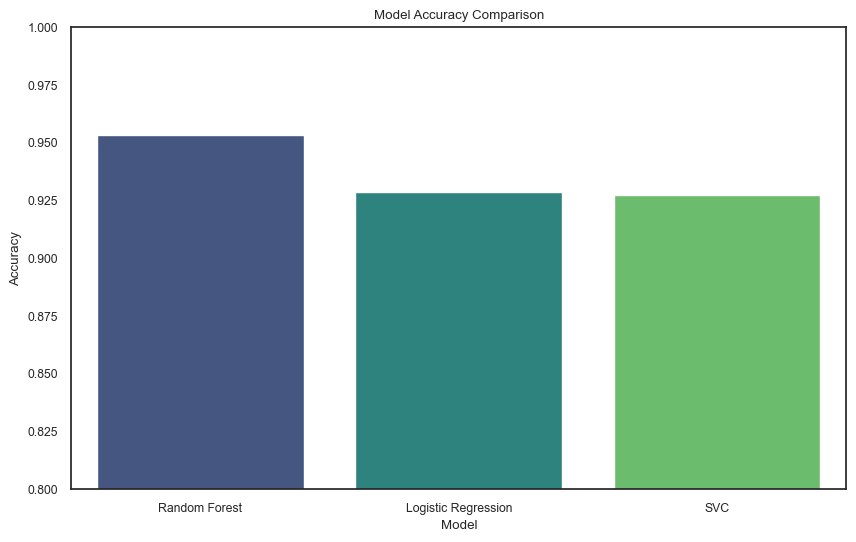

In [42]:
# Compare model accuracies
model_names = ['Random Forest', 'Logistic Regression', 'SVC']
accuracies = [accuracy_score(y_test, y_pred), 
              accuracy_score(y_test, lr_y_pred), 
              accuracy_score(y_test, svc_y_pred)]

# Create DataFrame for comparison
model_comparison = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

# Sort by accuracy
model_comparison = model_comparison.sort_values('Accuracy', ascending=False).reset_index(drop=True)

# Print comparison table
print("Model Accuracy Comparison:")
print(model_comparison)

# Plot model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=model_comparison, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0.8, 1.0)  # Adjust as needed for better visualization
plt.show()

Note: Current SVC configuration doesn't support probability predictions for ROC curve.


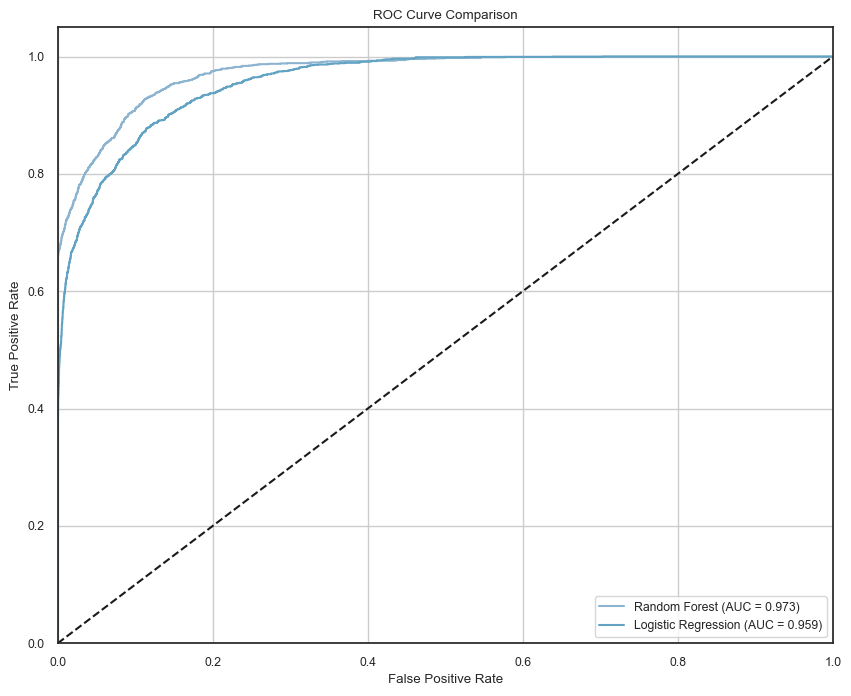

In [43]:
# Get probability predictions for ROC curves
rf_y_proba = grid_search.predict_proba(X_test)[:, 1]
lr_y_proba = lr_grid_search.predict_proba(X_test)[:, 1]

try:
    svc_y_proba = svc_grid_search.predict_proba(X_test)[:, 1]
    has_svc_proba = True
except AttributeError:
    # Some SVC configurations don't support probability predictions
    has_svc_proba = False
    print("Note: Current SVC configuration doesn't support probability predictions for ROC curve.")
    
# Plot ROC curves
plt.figure(figsize=(10, 8))

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_y_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_y_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')

# SVC ROC (if available)
if has_svc_proba:
    fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_y_proba)
    roc_auc_svc = auc(fpr_svc, tpr_svc)
    plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {roc_auc_svc:.3f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Detailed Model Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score
0        Random Forest      0.95       0.71    0.79      0.75
1  Logistic Regression      0.93       0.57    0.79      0.66
2                  SVC      0.93       0.56    0.79      0.66


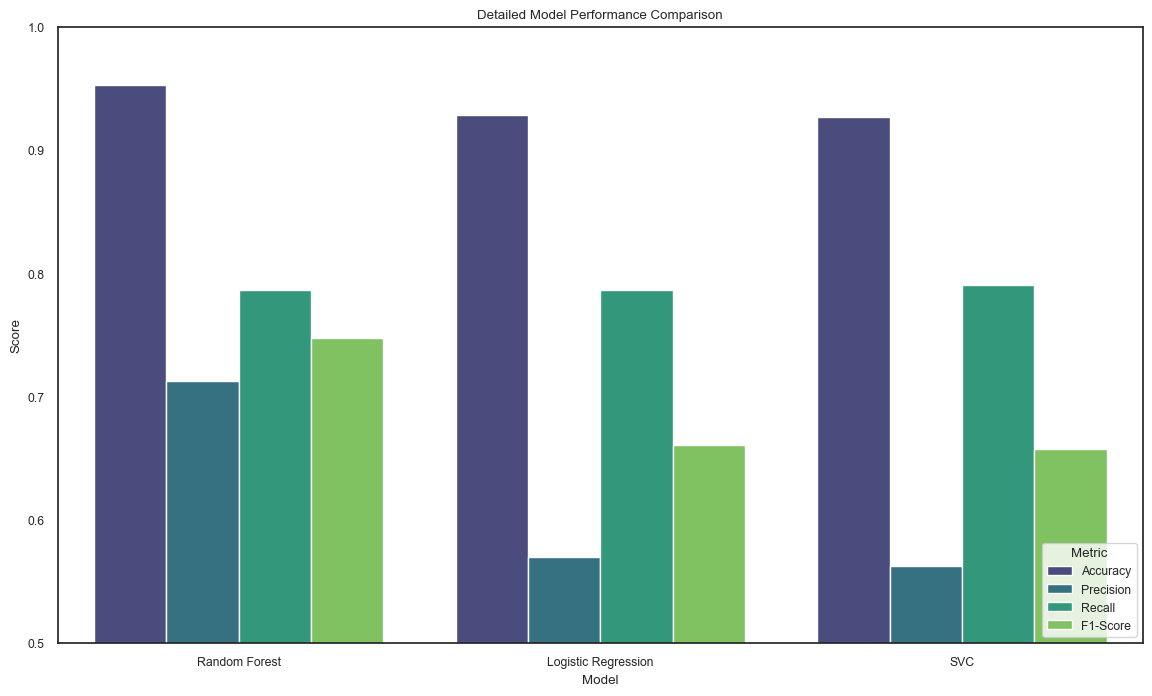

In [44]:
# Create a detailed metrics comparison
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics for each model
models = {
    'Random Forest': y_pred,
    'Logistic Regression': lr_y_pred,
    'SVC': svc_y_pred
}

metrics = []

for name, predictions in models.items():
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    
    metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Create DataFrame with all metrics
detailed_comparison = pd.DataFrame(metrics)

# Print detailed comparison
print("Detailed Model Comparison:")
print(detailed_comparison)

# Plot all metrics in a grouped bar chart
detailed_comparison_melted = pd.melt(detailed_comparison, 
                                    id_vars=['Model'], 
                                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                    var_name='Metric', 
                                    value_name='Score')

plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=detailed_comparison_melted, palette='viridis')
plt.title('Detailed Model Performance Comparison')
plt.ylim(0.5, 1.0)  # Adjust as needed
plt.legend(title='Metric', loc='lower right')
plt.show()

In [45]:
import joblib

# Save the best Random Forest model (includes preprocessor, sampling strategies, and classifier)
joblib.dump(grid_search.best_estimator_, 'random_forest_diabetes_model.pkl')

# Optionally print some information about the saved model
print("Random Forest model saved successfully to 'random_forest_diabetes_model.pkl'")
print(f"Model accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Best parameters: {grid_search.best_params_}")

Random Forest model saved successfully to 'random_forest_diabetes_model.pkl'
Model accuracy: 0.9530
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
